In [448]:
# Buisness Problem : It is Edible or Not 

In [449]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sklearn
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [450]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [451]:
print(df.info())
print(df.shape,df.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Mushroom Structure
<img src="Mushroom.jpg">

In [452]:
# class distribution
print(df.groupby('class').size())

class
e    4208
p    3916
dtype: int64


In [453]:
for col in df.columns:
    print(col)
    print("---------------------------")
    print(df[col].value_counts())

class
---------------------------
e    4208
p    3916
Name: class, dtype: int64
cap-shape
---------------------------
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
cap-surface
---------------------------
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
cap-color
---------------------------
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
bruises
---------------------------
f    4748
t    3376
Name: bruises, dtype: int64
odor
---------------------------
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
gill-attachment
---------------------------
f    7914
a     210
Name: gill-attachment, dtype: int64
gill-spacing
---------------------------
c    6812
w    1312
Name: gill-spacing, dtype: int64
gill-size
---------------------------
b    5612
n    2512
Name: gill-size, dtype: int6

In [454]:
df['class'].groupby(df['class']).size()

class
e    4208
p    3916
Name: class, dtype: int64

In [455]:
df['cap-shape'].value_counts()
#cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
# It is cap shape of mushroom 

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [456]:
df.drop(columns=['veil-type'],axis=1,inplace=True)

In [457]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [458]:
df['cap-surface'].value_counts()
#cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
# It is cap surface of mushroom

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

In [459]:
df['cap-color'].value_counts()
#cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
# color -type of mushroom

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

In [460]:
df['bruises'].value_counts()
#bruises: bruises=t,no=f
# Bruisess if any type of skin mark

f    4748
t    3376
Name: bruises, dtype: int64

In [461]:
df['odor'].value_counts()
#odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
# Smell of mashroom 

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

In [462]:
df['gill-attachment'].value_counts()
# gill-attachment: attached=a,free=f
# Its gill shape 

f    7914
a     210
Name: gill-attachment, dtype: int64

In [463]:
df['gill-spacing'].value_counts()
#gill-spacing: close=c,crowded=w

c    6812
w    1312
Name: gill-spacing, dtype: int64

In [464]:
df['gill-size'].value_counts()
# gill-size: broad=b,narrow=n
# Under the gill of mushroom 

b    5612
n    2512
Name: gill-size, dtype: int64

# Gills 

<img src ="gills.jpg">

In [465]:
df['gill-color'].value_counts()
# gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

In [466]:
df['stalk-shape'].value_counts()
#stalk-shape: enlarging=e,tapering=t

t    4608
e    3516
Name: stalk-shape, dtype: int64

In [467]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [468]:
df['stalk-root'].value_counts()
#stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
# ? Missing value : 2408

# Need to check 



# filling such values
df['stalk-root'].loc[df['stalk-root'] == '?'] = np.nan
df['stalk-root'].fillna(method='ffill',inplace=True)


In [469]:
df['stalk-surface-above-ring'].value_counts()
#stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64

In [470]:
df['stalk-surface-below-ring'].value_counts()
# stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

s    4936
k    2304
f     600
y     284
Name: stalk-surface-below-ring, dtype: int64

In [471]:
df['stalk-color-above-ring'].value_counts()
# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: stalk-color-above-ring, dtype: int64

In [472]:
df['stalk-color-below-ring'].value_counts()
#stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: stalk-color-below-ring, dtype: int64

#veil-type: partial=p
df['veil-type'].value_counts()
# Mark we only have partial viel

In [473]:
df['veil-color'].value_counts()
# veil-color: brown=n,orange=o,white=w,yellow=y

w    7924
n      96
o      96
y       8
Name: veil-color, dtype: int64

In [474]:
df['ring-number'].value_counts()
# ring-number: none=n,one=o,two=t
# none values : 36 , it is based on decison so i not drop it considering 0 ring number also have
# we can directly drop that .....

o    7488
t     600
n      36
Name: ring-number, dtype: int64

In [475]:
df['ring-type'].value_counts()
# ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

p    3968
e    2776
l    1296
f      48
n      36
Name: ring-type, dtype: int64

In [476]:
df['spore-print-color'].value_counts()
# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

w    2388
n    1968
k    1872
h    1632
r      72
u      48
y      48
b      48
o      48
Name: spore-print-color, dtype: int64

In [477]:
df['population'].value_counts()
# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64

In [478]:
df['habitat'].value_counts()
#habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [479]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [480]:
# Checking is there any na values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [481]:
# Split-out validation dataset
X = df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring','veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]
y = df['class'] 

In [482]:
from sklearn.preprocessing import OrdinalEncoder
# ordinal encode input variables
ordinal = OrdinalEncoder()
X = ordinal.fit_transform(X)

In [483]:
# change our class or  y manually
map1 = {'e':1,'p':0}
#y=y.map(map1)
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [484]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [485]:
# feature extraction method  to see which feature has more 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)
# we consider all features 

[0.0041537  0.00912259 0.01055184 0.1270653  0.12596796 0.00560259
 0.10951256 0.13324013 0.06782733 0.05936693 0.02682575 0.05457643
 0.03776114 0.01138629 0.019686   0.00068097 0.00800122 0.05628169
 0.07366464 0.03745202 0.02127291]


In [486]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.949221 (0.009350)
LDA: 0.944297 (0.008687)
KNN: 0.998461 (0.001192)
CART: 1.000000 (0.000000)
NB: 0.915368 (0.016511)
SVM: 0.999692 (0.000616)


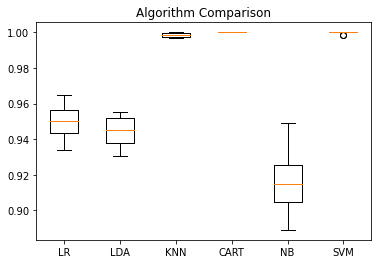

In [487]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

# Svc gives us a great accuracy

In [488]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
predictions

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [489]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9993846153846154
[[820   0]
 [  1 804]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       820
           p       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [490]:
X_validation
e1=pd.DataFrame(X_validation)
e1.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,...,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000
mean,3.369231,1.811077,4.545231,0.413538,4.184615,0.971692,0.147692,0.310154,4.728000,0.559385,...,1.559385,1.596308,5.776615,5.806769,1.960615,1.063385,2.283692,3.601231,3.648000,1.538462
std,1.628423,1.226503,2.576529,0.492619,2.151099,0.165901,0.354904,0.462699,3.519105,0.496614,...,0.632903,0.681917,1.937431,1.881221,0.259641,0.258443,1.802813,2.385506,1.260096,1.733445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,3.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [491]:
v1=np.array([1,2,1,5,1,6,5,3,1,4,5,4,3,2,4,5,3,3,1,3,2,2])
v1=v1.reshape(1,-1)
v1
model.predict(X_validation)


array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)